# Importing the Libraries

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and Cleaning the Data

In [2]:
def clean():
    #plt.figure(figsize=(5,5))
    df=pd.read_csv("ipl_matches.csv")
    df.replace({"Delhi Daredevils":"Delhi Capitals","Rising Pune Supergiant":"Rising Pune Supergiants"}, inplace=True)
    df["date"]=pd.to_datetime(df["date"])
    wins=pd.concat([(df["team1"].value_counts()+df["team2"].value_counts()).rename("Total Matches"), df["winner"].value_counts().rename("Wins")], axis=1, sort=False)
    wins["Win %"]=round(wins["Wins"]/wins["Total Matches"],3)*100
    wins.sort_values("Total Matches", inplace=True, ascending=False)
    return wins

# Acronym for Teams

In [3]:
def acronym(s):
    return "".join([i[0] for i in s.split()])

# Plotting The Data

<IPython.core.display.Javascript object>


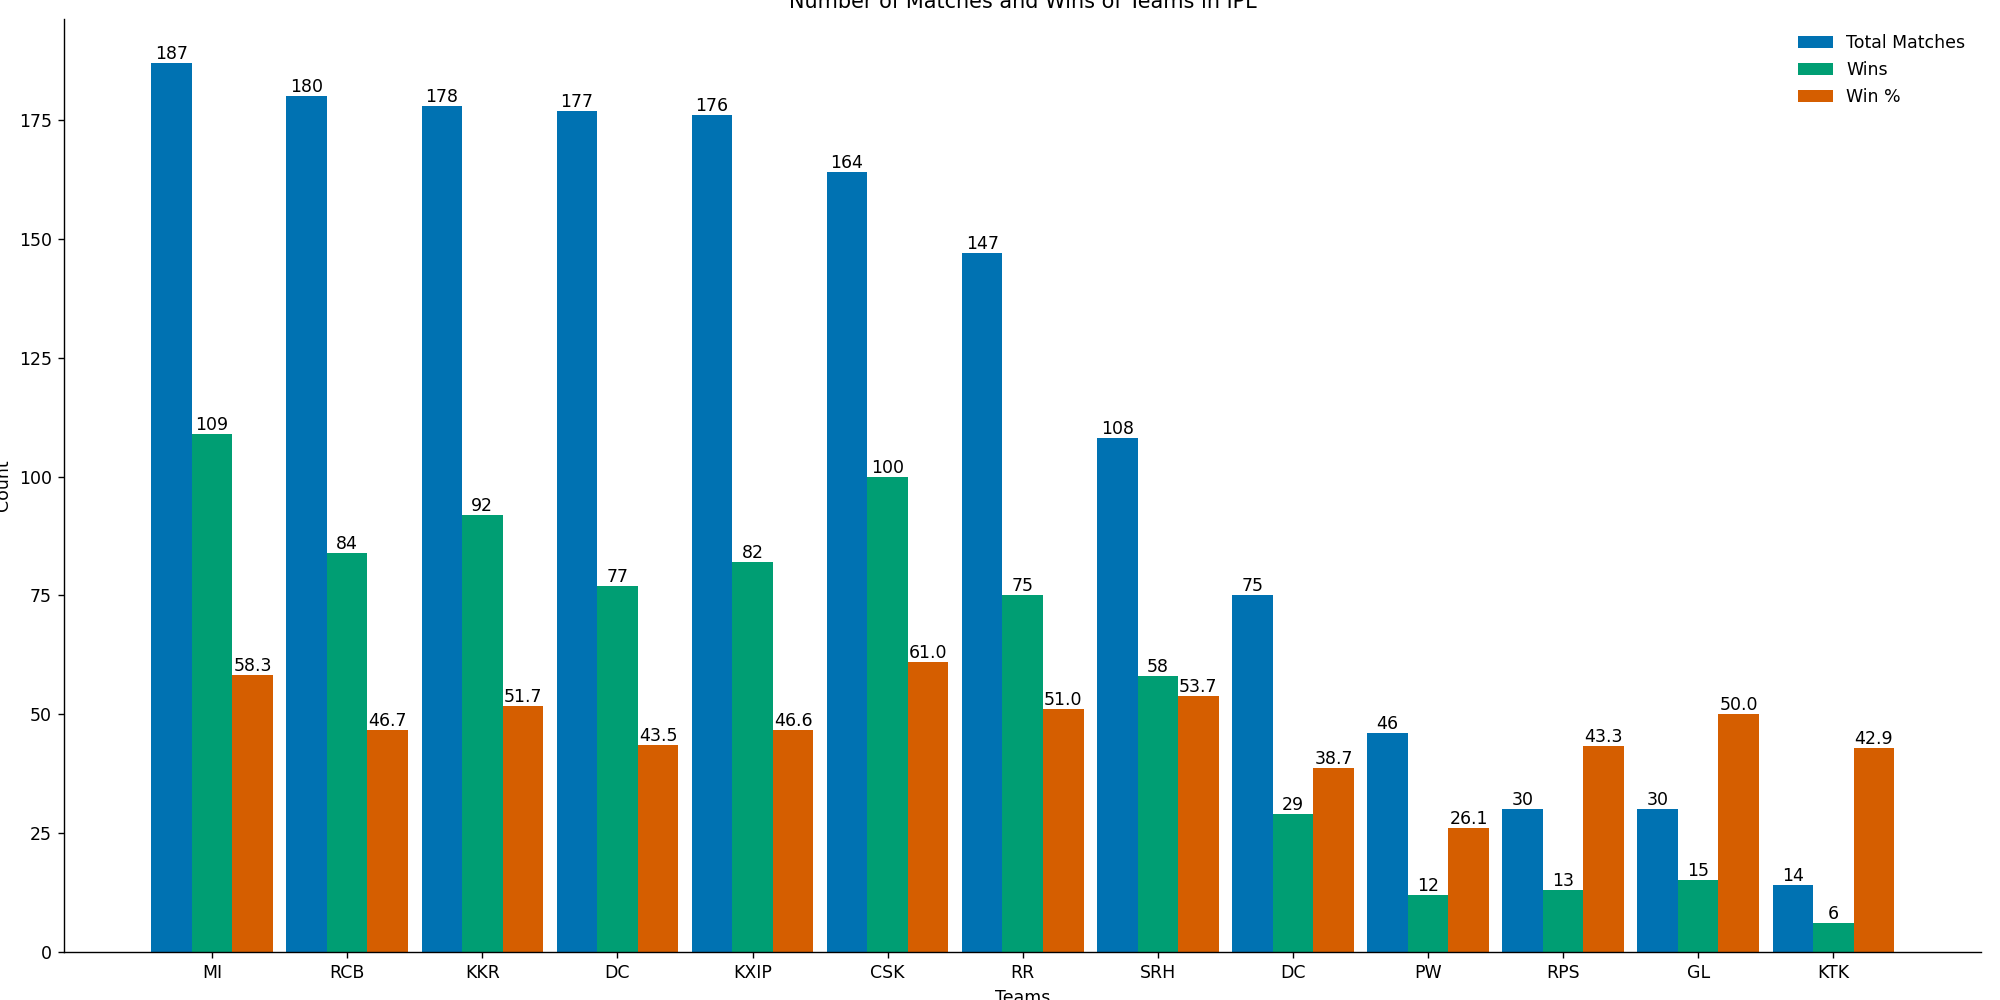

In [4]:
t=clean()
n=len(t.index)
ind=np.arange(0,13)
width=0.3
plt.style.use("seaborn-colorblind")
plt.figure(figsize=(16,8))
plt.bar(ind-width, t["Total Matches"], width, label="Total Matches",)
plt.bar(ind, t["Wins"],width, label="Wins")
plt.bar(ind+width, t["Win %"], width, label="Win %")
plt.xticks(ind, ['MI', 'RCB', 'KKR', 'DC', 'KXIP', 'CSK', 'RR', 'SRH', 'DC', 'PW', 'RPS', 'GL', 'KTK'])
plt.tight_layout()
plt.title("Number of Matches and Wins of Teams in IPL")
plt.xlabel("Teams")
plt.ylabel("Count")
plt.legend(loc="best", frameon=False);
#plt.yticks([])
ax=plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.show()

# Adding the y-values on top of the bars

In [5]:
def addtext(vals, offset):
    for ind, val in enumerate(vals):
        plt.text(ind-offset, val, str(val), ha="center", va="bottom")
addtext(t["Total Matches"], width)
addtext(t["Wins"], 0)
addtext(t["Win %"], -width)

# Saving the Image

In [6]:
plt.savefig("IPL_Total_Wins.jpg", bbox_inches='tight')